In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_descent import GradientDescentMultipleLR
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train = np.array([[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01],
       [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01],
       [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01],
       [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01],
       [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01],
       [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01],
       [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01],
       [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01],
       [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01],
       [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01],
       [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 3.50e+01],
       [1.32e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.59e+03, 0.00e+00, 1.00e+00, 2.00e+01],
       [9.72e+02, 2.00e+00, 1.00e+00, 7.30e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 3.70e+01],
       [1.00e+03, 2.00e+00, 1.00e+00, 5.10e+01],
       [9.04e+02, 3.00e+00, 1.00e+00, 5.50e+01],
       [1.69e+03, 3.00e+00, 1.00e+00, 1.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.42e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.20e+01],
       [1.94e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 7.40e+01],
       [2.48e+03, 4.00e+00, 2.00e+00, 1.60e+01],
       [1.20e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.84e+03, 3.00e+00, 2.00e+00, 2.00e+01],
       [1.85e+03, 3.00e+00, 2.00e+00, 5.70e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.10e+03, 2.00e+00, 2.00e+00, 9.70e+01],
       [1.78e+03, 3.00e+00, 2.00e+00, 2.80e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.78e+03, 4.00e+00, 2.00e+00, 1.07e+02],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.55e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 5.80e+01],
       [1.35e+03, 3.00e+00, 1.00e+00, 2.10e+01],
       [1.57e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.49e+03, 3.00e+00, 1.00e+00, 5.70e+01],
       [1.51e+03, 2.00e+00, 1.00e+00, 1.60e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 2.70e+01],
       [1.76e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [1.47e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 8.40e+01],
       [1.65e+03, 3.00e+00, 1.00e+00, 1.90e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 6.00e+01],
       [1.12e+03, 2.00e+00, 2.00e+00, 1.60e+01],
       [1.15e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 3.90e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.39e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.60e+03, 3.00e+00, 2.00e+00, 2.90e+01],
       [1.22e+03, 3.00e+00, 1.00e+00, 6.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [2.60e+03, 4.00e+00, 2.00e+00, 2.20e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 5.90e+01],
       [2.09e+03, 3.00e+00, 2.00e+00, 2.60e+01],
       [1.79e+03, 4.00e+00, 2.00e+00, 4.90e+01],
       [1.48e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.20e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.98e+03, 3.00e+00, 2.00e+00, 2.20e+01],
       [1.06e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.18e+03, 2.00e+00, 1.00e+00, 9.90e+01],
       [1.36e+03, 2.00e+00, 1.00e+00, 1.70e+01],
       [9.60e+02, 3.00e+00, 1.00e+00, 5.10e+01],
       [1.46e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.45e+03, 3.00e+00, 2.00e+00, 2.50e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [8.82e+02, 3.00e+00, 1.00e+00, 4.90e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.03e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.43e+03, 3.00e+00, 2.00e+00, 2.10e+01],
       [1.66e+03, 3.00e+00, 1.00e+00, 6.10e+01],
       [1.54e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [9.48e+02, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.43e+03, 2.00e+00, 1.00e+00, 4.30e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.21e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.05e+03, 2.00e+00, 1.00e+00, 6.50e+01]])

y_train = np.array([300., 509.8, 394., 540., 415., 230., 560., 294.,
                    718.2, 200., 302., 468., 374.2, 388., 282., 311.8,
                    401., 449.8, 301., 502., 340., 400.28, 572., 264.,
                    304., 298., 219.8, 490.7, 216.96, 368.2, 280., 526.87,
                    237., 562.43, 369.8, 460., 374., 390., 158., 426.,
                    390., 277.77, 216.96, 425.8, 504., 329., 464., 220.,
                    358., 478., 334., 426.98, 290., 463., 390.8, 354.,
                    350., 460., 237., 288.3, 282., 249., 304., 332.,
                    351.8, 310., 216.96, 666.34, 330., 480., 330.3, 348.,
                    304., 384., 316., 430.4, 450., 284., 275., 414.,
                    258., 378., 350., 412., 373., 225., 390., 267.4,
                    464., 174., 340., 430., 440., 216., 329., 388.,
                    390., 356., 257.8])
X_features = ['Size (sqft)', 'Bedrooms', 'Floors', 'Age (years)']
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')

X_train.shape = (99, 4)
y_train.shape = (99,)


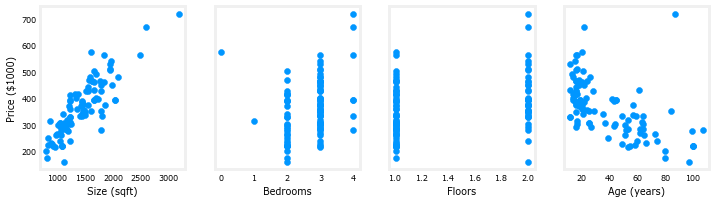

In [3]:
'''
Plotting each feature vs. the target price. These plots provide indication which features have the strongest 
influence on the price. It seems, increasing size also increases price. Bedrooms and floors don't seem to have 
a strong impact on price. Newer houses have higher prices than older houses.
'''

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('Price ($1000)')
plt.show()

In [4]:
'''
This learning rate seems too large, the cost seems to increase rather than decrease. The values of the weights
seem go up and down and the values of their derivates seem to fluctuate between postive and negative values. All
of these are the signs that the gradient descent algorithm is not converging and therefore, the learning rate must 
be too large. 
'''
lr = 9.9e-7
w0 = np.array([5.5e-01,  1.0e-03,  5.1e-04,  1.2e-02])
b0 = 3.6e-04
iterations = 10
gd = GradientDescentMultipleLR(X_train, y_train, lr)
w, b, costs, df = gd.run(w0, b0, iterations)
df

,iteration,cost,w0,w1,w2,w3,b,dj_dw0,dj_dw1,dj_dw2,dj_dw3,dj_db
0,0.0,9.557139e+04,0.546272,0.000996,0.000513,0.012279,0.000360,-5.517900e+05,-1006.002323,-518.511717,-12402.741313,-363.156061
1,1.0,1.281663e+05,-0.087645,-0.000174,-0.000100,-0.003407,-0.000049,6.403206e+05,1181.901886,619.747231,15843.737599,412.148075
2,2.0,1.720644e+05,0.648053,0.001169,0.000594,0.013362,0.000434,-7.431296e+05,-1357.184154,-701.209816,-16937.752054,-487.603042
3,3.0,2.311852e+05,-0.205694,-0.000404,-0.000229,-0.007531,-0.000117,8.623712e+05,1589.425233,831.765388,21104.016925,556.555700
4,4.0,3.108077e+05,0.785118,0.001408,0.000708,0.015283,0.000532,-1.000820e+06,-1830.141872,-947.261810,-23044.952617,-655.202497
5,5.0,4.180410e+05,-0.364691,-0.000709,-0.000398,-0.012624,-0.000212,1.161423e+06,2138.270140,1117.306058,28188.835009,751.042008
6,6.0,5.624601e+05,0.969701,0.001733,0.000868,0.018333,0.000660,-1.347871e+06,-2467.103911,-1278.637036,-31269.534637,-880.918483
7,7.0,7.569597e+05,-0.578833,-0.001115,-0.000619,-0.019020,-0.000342,1.564177e+06,2877.442912,1501.864764,37730.889416,1012.972860
8,8.0,1.018906e+06,1.218283,0.002176,0.001089,0.022902,0.000831,-1.815269e+06,-3324.942327,-1724.923173,-42345.746754,-1184.904172
9,9.0,1.371689e+06,-0.867246,-0.001658,-0.000911,-0.027175,-0.000521,2.106594e+06,3872.943850,2019.778155,50582.279292,1365.736112


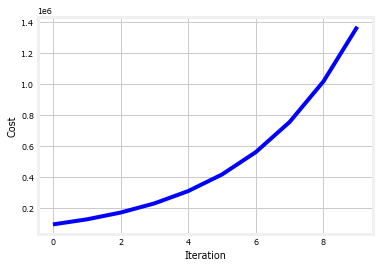

In [5]:
plt.plot(np.arange(iterations), costs, c='b')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()

In [6]:
'''
Setting lr = 9e-7, seems to decreasing the value of the cost function.
'''
lr = 9e-7
w0 = np.array([5.5e-01,  1.0e-03,  5.1e-04,  1.2e-02])
b0 = 3.6e-04
iterations = 10
gd = GradientDescentMultipleLR(X_train, y_train, lr)
w, b, costs, df = gd.run(w0, b0, iterations)
df

,iteration,cost,w0,w1,w2,w3,b,dj_dw0,dj_dw1,dj_dw2,dj_dw3,dj_db
0,0.0,66446.952584,0.496611,0.000905,0.000467,0.011162,0.000327,-551790.014141,-1006.002323,-518.511717,-12402.741313,-363.156061
1,1.0,61871.755807,0.017859,0.000021,0.000002,-0.000786,0.000019,531946.926706,983.001504,516.269145,13275.875880,341.665881
2,2.0,57619.174461,0.479450,0.000862,0.000435,0.009548,0.000323,-512878.821980,-934.598182,-481.359907,-11481.844585,-337.855362
3,3.0,53666.457718,0.034460,0.000039,0.000003,-0.001599,0.000038,494432.877649,914.140527,480.448045,12385.875804,317.262265
4,4.0,49992.459142,0.463501,0.000821,0.000405,0.007964,0.000321,-476711.649344,-868.230190,-446.828158,-10625.965640,-314.339268
5,5.0,46577.523543,0.049893,0.000055,0.000003,-0.002439,0.000056,459564.325047,850.134911,447.152940,11558.562638,294.579196
6,6.0,43403.381819,0.448678,0.000781,0.000376,0.006409,0.000319,-443094.987695,-806.543196,-414.731705,-9830.519294,-292.481929
7,7.0,40453.053207,0.064239,0.000070,0.000001,-0.003302,0.000073,427154.708211,790.642259,416.205697,10789.515819,273.495344
8,8.0,37710.754428,0.434903,0.000744,0.000348,0.004880,0.000318,-411848.974735,-749.207095,-384.898809,-9091.243709,-272.166367
9,9.0,35161.815242,0.077575,0.000082,-0.000001,-0.004187,0.000089,397030.622732,735.344316,387.440745,10074.626524,253.897931


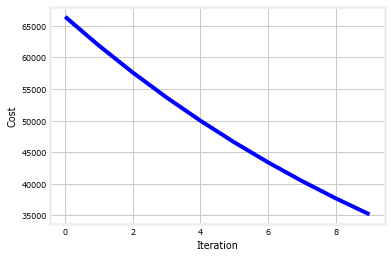

w, b found by gradient descent: (array([ 7.75754888e-02,  8.21857232e-05, -1.06764977e-06, -4.18692791e-03]), 8.91885319389938e-05)


In [7]:
plt.plot(np.arange(iterations), costs, c='b')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()
print(f'w, b found by gradient descent: {w, b}')